In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Decision Tree Classification

To the credit risk example we will use a [credit risk dataset](https://www.kaggle.com/uciml/german-credit). The objective is to determine which clients will be granted credit, based on several features.

This dataset is a classic, and widely used, but it simplifies the credit risk process considerably. In real life, this problem is treated using several information, from different sources. For an idea of the real complexity of the problem, I suggest taking a look at [this competition](https://www.kaggle.com/c/home-credit-default-risk/data).

In [2]:
df = pd.read_csv("../data/german-credit-data.csv", index_col=0)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [4]:
df_model = df.select_dtypes(include=np.number)
df_model.head()

,Age,Job,Credit amount,Duration
0,67,2,1169,6
1,22,2,5951,48
2,49,1,2096,12
3,45,2,7882,42
4,53,2,4870,24


In [5]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            1000 non-null   int64
 1   Job            1000 non-null   int64
 2   Credit amount  1000 non-null   int64
 3   Duration       1000 non-null   int64
dtypes: int64(4)
memory usage: 39.1 KB


In [6]:
df_model = pd.concat([df_model, df["Risk"]], axis=1)
df_model.head()

,Age,Job,Credit amount,Duration,Risk
0,67,2,1169,6,good
1,22,2,5951,48,bad
2,49,1,2096,12,good
3,45,2,7882,42,good
4,53,2,4870,24,bad


There is a considerable imbalance in the target, but for now, we will not worry about addressing it at the start. We will just make sure that the proportion is maintained after the train-test split, when we do it.

In [7]:
df_model["Risk"].value_counts(normalize=True)

good    0.7
bad     0.3
Name: Risk, dtype: float64

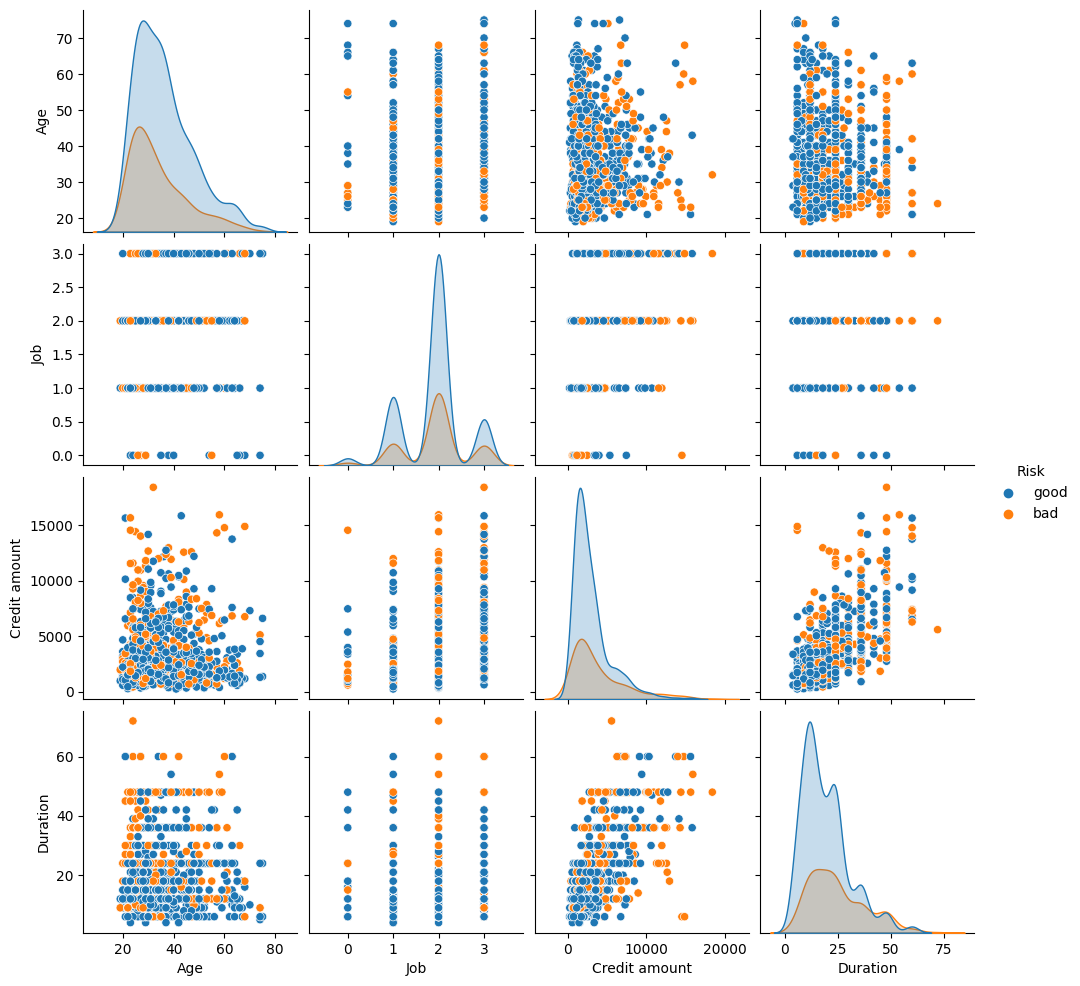

In [8]:
sns.pairplot(data=df_model, hue="Risk");

We have two columns with missing data. It is important that these missing data be treated properly: either these lines are **deleted**, or the **null data is filled**. In the first version of our model, we will drop all lines with missing (and, in addition, we will use only the numerical features).

Let's build a decision tree classifier, whose class is [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [9]:
X = df_model.drop(columns="Risk")
y = df_model["Risk"]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
y_train.value_counts(normalize=True)

good    0.7
bad     0.3
Name: Risk, dtype: float64

In [12]:
y_test.value_counts(normalize=True)

good    0.7
bad     0.3
Name: Risk, dtype: float64

In [13]:
df_model.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


## Testing with logit

In [14]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression


Training evaluation metrics:


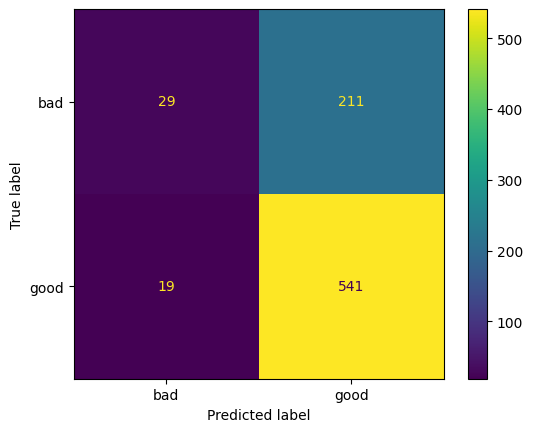

              precision    recall  f1-score   support

         bad       0.60      0.12      0.20       240
        good       0.72      0.97      0.82       560

    accuracy                           0.71       800
   macro avg       0.66      0.54      0.51       800
weighted avg       0.68      0.71      0.64       800


Test evaluation metrics:


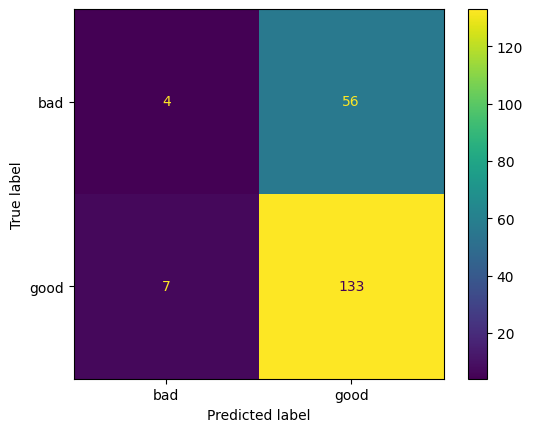

              precision    recall  f1-score   support

         bad       0.36      0.07      0.11        60
        good       0.70      0.95      0.81       140

    accuracy                           0.69       200
   macro avg       0.53      0.51      0.46       200
weighted avg       0.60      0.69      0.60       200



In [15]:
lr = LogisticRegression().fit(X_train, y_train)

# ============================================

print("\nTraining evaluation metrics:")

y_pred_train = lr.predict(X_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()
print(classification_report(y_train, y_pred_train))

# ============================================

print("\nTest evaluation metrics:")

y_pred_test = lr.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()
print(classification_report(y_test, y_pred_test))

## Testing with decision tree

In [16]:
from sklearn.tree import DecisionTreeClassifier


Training evaluation metrics:


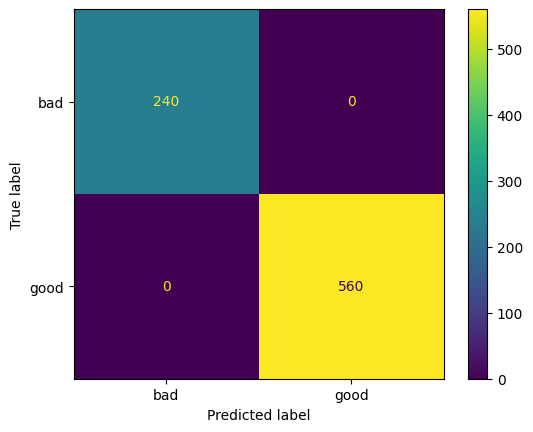

              precision    recall  f1-score   support

         bad       1.00      1.00      1.00       240
        good       1.00      1.00      1.00       560

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


Test evaluation metrics:


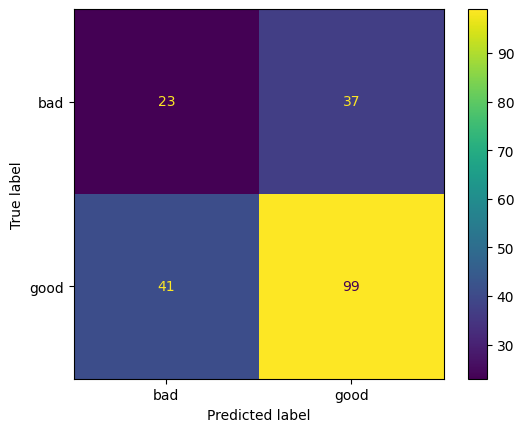

              precision    recall  f1-score   support

         bad       0.36      0.38      0.37        60
        good       0.73      0.71      0.72       140

    accuracy                           0.61       200
   macro avg       0.54      0.55      0.54       200
weighted avg       0.62      0.61      0.61       200



In [17]:
dt = DecisionTreeClassifier().fit(X_train, y_train)

# ============================================

print("\nTraining evaluation metrics:")

y_pred_train = dt.predict(X_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()
print(classification_report(y_train, y_pred_train))

# ============================================

print("\nTest evaluation metrics:")

y_pred_test = dt.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()
print(classification_report(y_test, y_pred_test))

The model overfitted the training data, and did not generalize well to the test data. Why did this happen? We will discuss this further, but the fact is that the decision tree method is notoriously **prone to overfitting**. To understand why, let's take a look at the trained tree.

__Visualizing the decision tree__

It is possible to visualize the decision tree, by using the `plot_tree()` function of the tree sub-module. For more details on how to plot the tree, [click here](https://scikit-learn.org/stable/modules/tree.html#tree)

In [18]:
from sklearn.tree import plot_tree

In [19]:
dt.get_depth()

19

In [20]:
dt.get_n_leaves()

229

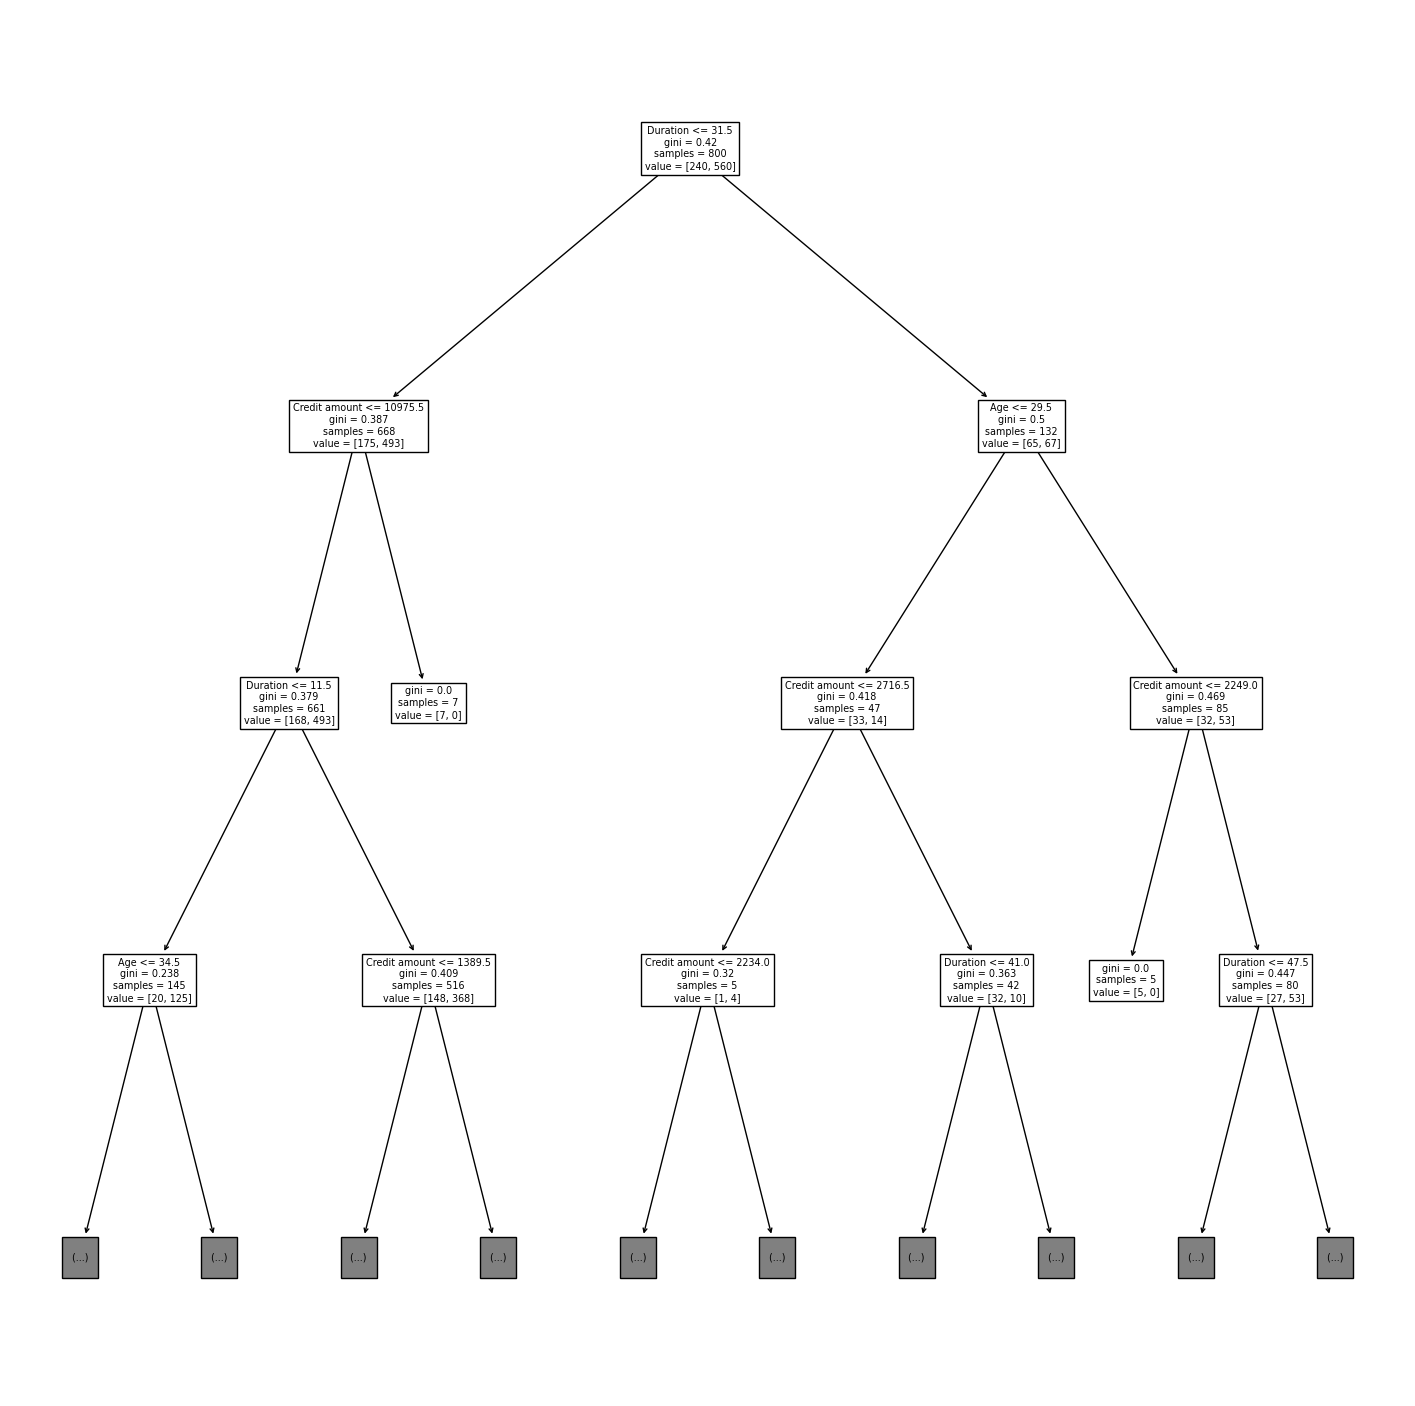

In [21]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 18))
plot_tree(dt, feature_names=X_train.columns, max_depth=3);

The tree is **too deep**, which implies a **too complex model**. In fact, if we imagine the hypothesis as a function defined by parts, the more breaks, the more parts, which makes the hypothesis more complex, and therefore more prone to overfitting.

## Decision tree theory

Say we have a sample with 30 observations of two distinct cathegories and two variables to cathegorize them. The decision tree will segregate the observations based on the values of the variables and **identify the variable that creates the best homogeneous sets of observations** regarding the target.

Every tree starts from the root node, so a natural question is: **which feature should be user to determine de root node?**Mathematically, the model can use two different criteria to decide how to make the breaks in the tree: the **Gini criterion** or the **entropy criterion**.

### Gini criterion

The **Gini impurity** measures how "impure" are the leaves of the trees built after the breaks in the nodes. The coefficient is given by:

$$Gini(D) = 1 - \sum{p_{i}^2}$$

Where $p_i$ are the **proportions** of the target separation in each break.

Here we will be interested **in how the impurity changes after the breaks**. Our goal will be to **maximize the purification provided by the break in the nodes** -- more precisely, we are interested in determining **which is the break that provides the greatest purification**.

### Entropy criterion

The **entropy** is a quantity defined in physics and information theory with the objective of quantifying **the degree of disorder of a system**, or, equivalently, **how much information one has about a given system**.

The entropy is given by:

 $$E = -\sum{p_{i} \log_{2}{p_{i}}}$$
 
Where $p_i$ are the **proportions** of the target separation in each break. Here as well we will be interested **in how the entropy changes after the breaks**. Our goal will be to **maximize the information gain provided by the break in the nodes** -- more precisely, we are interested in determining **which is the break that provides the greatest information gain**.

### What is the difference between the two criteria?

The origin, and small computational differences. The Gini criterion is a measure of the **impurity** of the nodes, while the entropy criterion is a measure of the **information gain** provided by the break in the nodes. Despite the similarity between the two measures, it is possible that there are differences in the results generated by each one of them.

<img src="https://qph.fs.quoracdn.net/main-qimg-3f3484dc9513748c3283fa0d1d996e82" width=600>

And, besides the split criterion, we have some other very important hyperparameters for the decision tree, especially with regard to its **regularization**: `max_depth`, `min_samples_split`, `min_samples_leaf`, `max_leaf_nodes`, `min_impurity_decrease`, `ccp_alpha`.

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [23]:
pipe = Pipeline([("dt", DecisionTreeClassifier(random_state=42))])

# ============================================

params_grid_dt = {"dt__criterion" : ["gini", "entropy"],
                  "dt__splitter" : ["best", "random"],
                  "dt__max_depth" : range(2, 11)} 

splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_dt = GridSearchCV(estimator=pipe,
                       param_grid=params_grid_dt,
                       scoring="f1_weighted",
                       cv=splitter)

grid_dt.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('dt',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': range(2, 11),
                         'dt__splitter': ['best', 'random']},
             scoring='f1_weighted')

In [24]:
grid_dt.best_params_

{'dt__criterion': 'entropy', 'dt__max_depth': 8, 'dt__splitter': 'random'}

In [25]:
grid_dt.best_estimator_["dt"].get_n_leaves()

87


Train evaluation metrics:


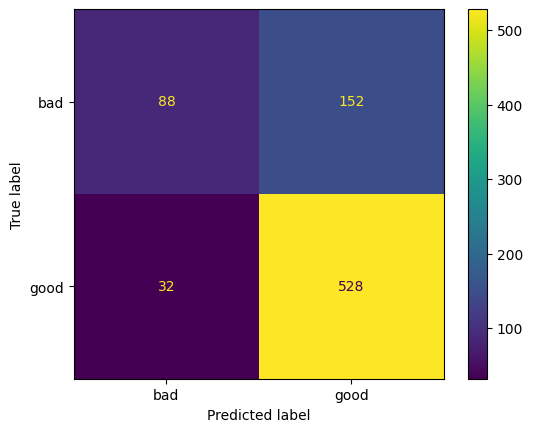

              precision    recall  f1-score   support

         bad       0.73      0.37      0.49       240
        good       0.78      0.94      0.85       560

    accuracy                           0.77       800
   macro avg       0.75      0.65      0.67       800
weighted avg       0.76      0.77      0.74       800


Test evaluation metrics:


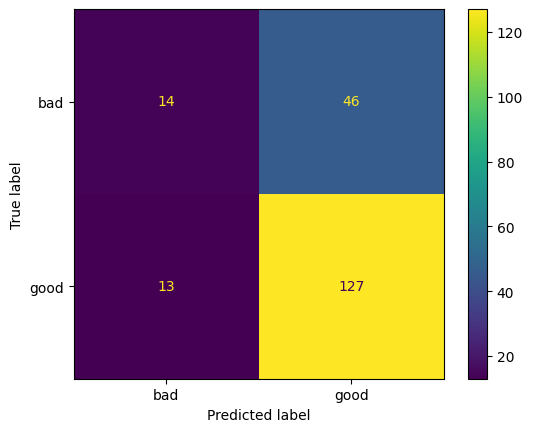

              precision    recall  f1-score   support

         bad       0.52      0.23      0.32        60
        good       0.73      0.91      0.81       140

    accuracy                           0.70       200
   macro avg       0.63      0.57      0.57       200
weighted avg       0.67      0.70      0.66       200



In [26]:
print("\nTrain evaluation metrics:")

y_pred_train = grid_dt.predict(X_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()
print(classification_report(y_train, y_pred_train))

# ============================================

print("\nTest evaluation metrics:")

y_pred_test = grid_dt.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()
print(classification_report(y_test, y_pred_test))

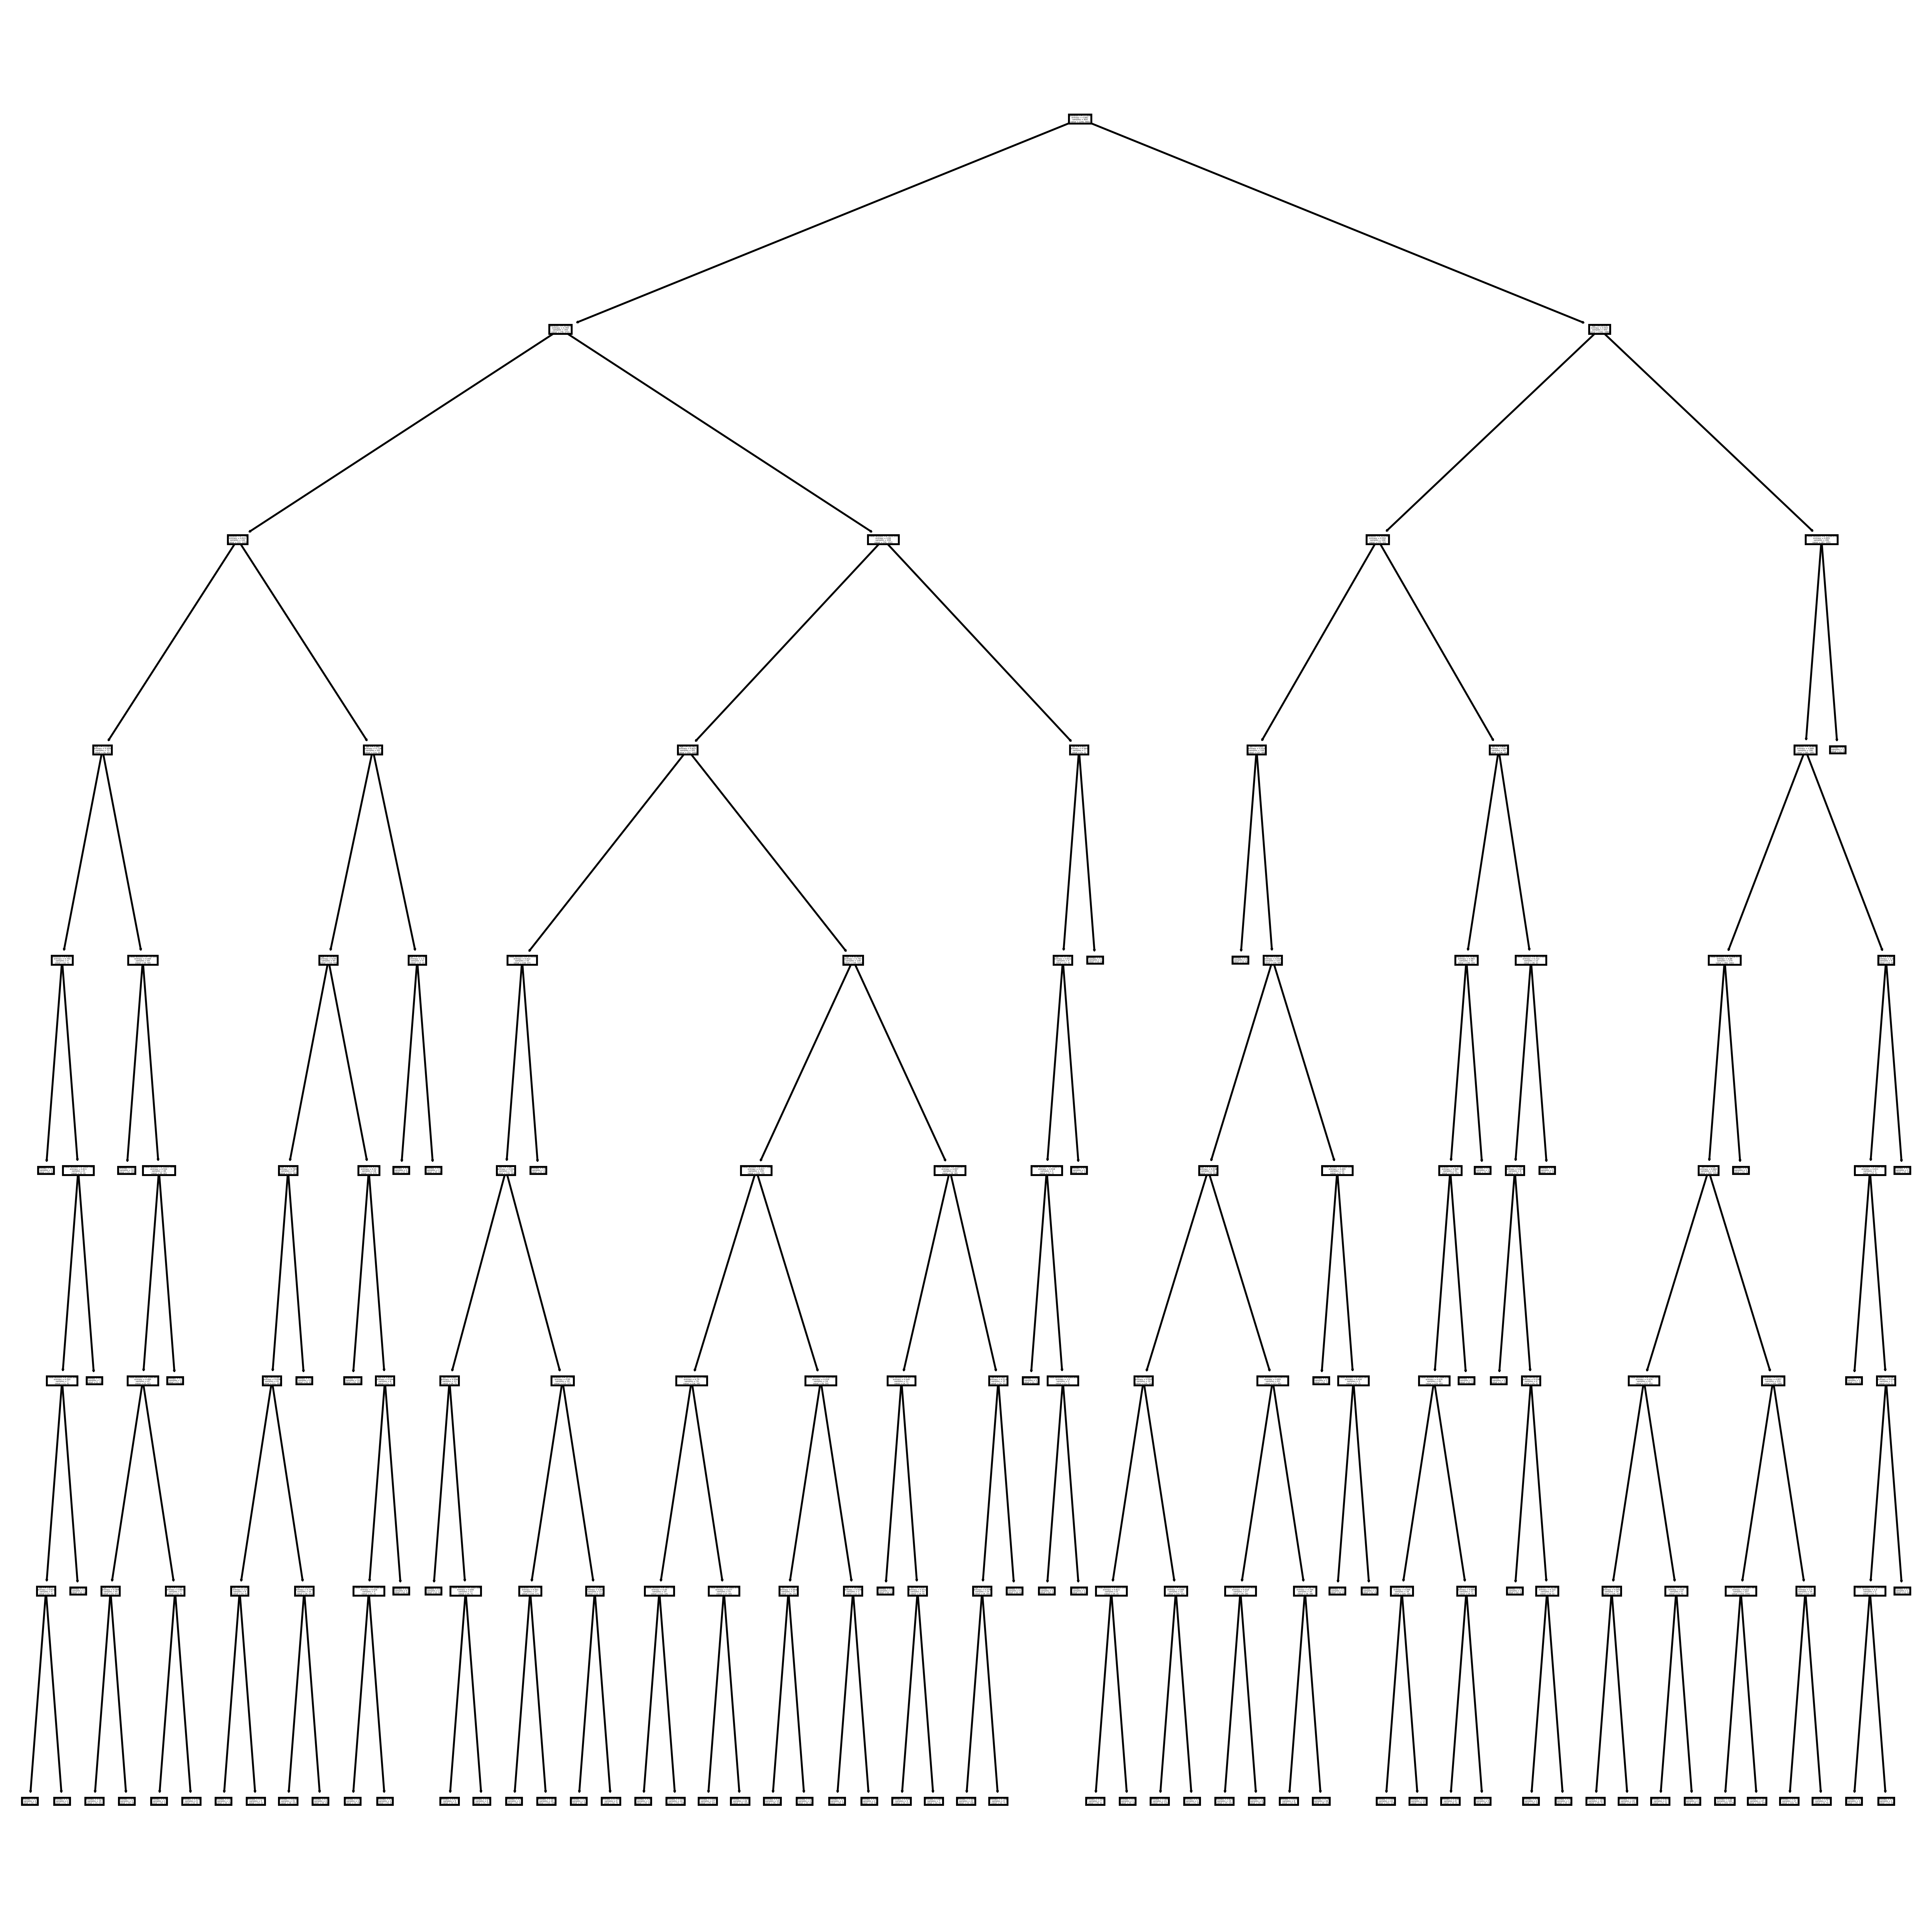

In [27]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 18), dpi=500)
plot_tree(grid_dt.best_estimator_["dt"], feature_names=X_train.columns);

Another way to search for hyperparameters is through **a random search**, which can be done through [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

<img src="https://www.yourdatateacher.com/wp-content/uploads/2021/03/image-7.png" width=400>

The main difference between this searcher and the GridSearch is that in this case we do not explicitly list the values of the hyperparameters to be combined, but we pass **the possible values of the hyperparameters, which are randomly sampled in order to generate random combinations**. Then, instead of trying all possible combinations, we test only **a determined number of randomly sampled combinations from the distributions**.

<img src=https://miro.medium.com/max/1004/0*yDmmJmvRowl0cSN8.png width=700>

For more information on this method, [click here](https://scikit-learn.org/stable/modules/grid_search.html#randomized-parameter-search). [Check here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html) a comparison between the two methods.

In [28]:
from sklearn.model_selection import RandomizedSearchCV

In [29]:
import scipy

# ============================================

pipe = Pipeline([("dt", DecisionTreeClassifier(random_state=42))])

# ============================================

params_ditro_dt = {"dt__criterion" : ["gini", "entropy"],
                   "dt__splitter" : ["best", "random"],
                   "dt__min_impurity_decrease" : scipy.stats.uniform(0, 1)} 

splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_dt_random = RandomizedSearchCV(estimator=pipe,
                                     n_iter=100,
                                     param_distributions=params_ditro_dt,
                                     scoring="f1_weighted",
                                     cv=splitter)

grid_dt_random.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('dt',
                                              DecisionTreeClassifier(random_state=42))]),
                   n_iter=100,
                   param_distributions={'dt__criterion': ['gini', 'entropy'],
                                        'dt__min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x29b757b20>,
                                        'dt__splitter': ['best', 'random']},
                   scoring='f1_weighted')


Train evaluation metrics:


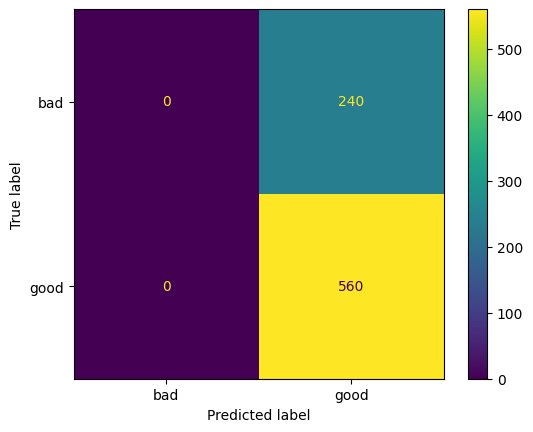

              precision    recall  f1-score   support

         bad       0.00      0.00      0.00       240
        good       0.70      1.00      0.82       560

    accuracy                           0.70       800
   macro avg       0.35      0.50      0.41       800
weighted avg       0.49      0.70      0.58       800


Test evaluation metrics:


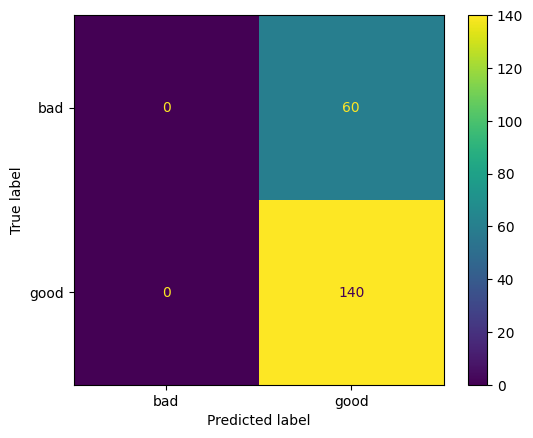

              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        60
        good       0.70      1.00      0.82       140

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.49      0.70      0.58       200



In [30]:
# ============================================

print("\nTrain evaluation metrics:")

y_pred_train = grid_dt_random.predict(X_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()
print(classification_report(y_train, y_pred_train))

# ============================================

print("\nTest evaluation metrics:")

y_pred_test = grid_dt_random.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()
print(classification_report(y_test, y_pred_test))

In [31]:
grid_dt_random.best_params_

{'dt__criterion': 'entropy',
 'dt__min_impurity_decrease': 0.9522734133372136,
 'dt__splitter': 'random'}

In [32]:
grid_dt_random.best_estimator_["dt"].get_depth()

0

In [33]:
grid_dt_random.best_estimator_["dt"].get_n_leaves()

1

In the case above, the best value for `min_impurity_decrease` was too high, so no break was made. To solve, let's narrow the distribution.

In [34]:
# ============================================

pipe = Pipeline([("dt", DecisionTreeClassifier(random_state=42))])

# ============================================

params_ditro_dt = {"dt__criterion" : ["gini", "entropy"],
                   "dt__splitter" : ["best", "random"],
                   "dt__min_impurity_decrease" : scipy.stats.uniform(0, 0.05)} 

splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_dt_random = RandomizedSearchCV(estimator=pipe,
                                     n_iter=100,
                                     param_distributions=params_ditro_dt,
                                     scoring="f1_weighted",
                                     cv=splitter)

grid_dt_random.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('dt',
                                              DecisionTreeClassifier(random_state=42))]),
                   n_iter=100,
                   param_distributions={'dt__criterion': ['gini', 'entropy'],
                                        'dt__min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x28809ab20>,
                                        'dt__splitter': ['best', 'random']},
                   scoring='f1_weighted')

In [35]:
grid_dt_random.best_params_

{'dt__criterion': 'entropy',
 'dt__min_impurity_decrease': 0.009090311218525566,
 'dt__splitter': 'best'}

In [36]:
grid_dt_random.best_score_

0.6418891445287092

In [37]:
grid_dt_random.best_estimator_["dt"].get_depth()

4


Train evaluation metrics:


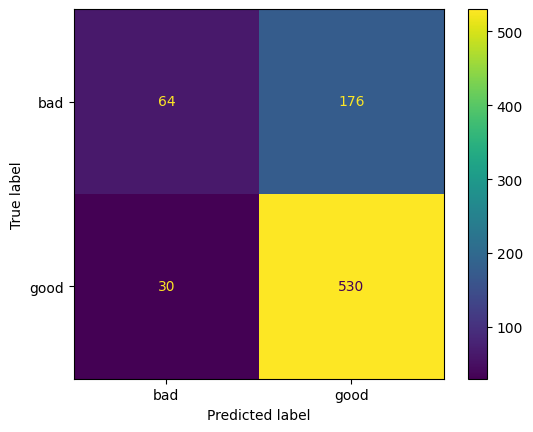

              precision    recall  f1-score   support

         bad       0.68      0.27      0.38       240
        good       0.75      0.95      0.84       560

    accuracy                           0.74       800
   macro avg       0.72      0.61      0.61       800
weighted avg       0.73      0.74      0.70       800


Test evaluation metrics:


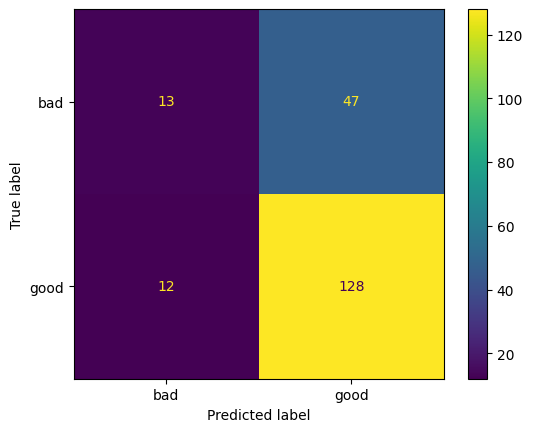

              precision    recall  f1-score   support

         bad       0.52      0.22      0.31        60
        good       0.73      0.91      0.81       140

    accuracy                           0.70       200
   macro avg       0.63      0.57      0.56       200
weighted avg       0.67      0.70      0.66       200



In [38]:
print("\nTrain evaluation metrics:")

y_pred_train = grid_dt_random.predict(X_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()
print(classification_report(y_train, y_pred_train))

# ============================================

print("\nTest evaluation metrics:")

y_pred_test = grid_dt_random.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()
print(classification_report(y_test, y_pred_test))

In [39]:
# ============================================

pipe = Pipeline([("dt", DecisionTreeClassifier(random_state=42))])

# ============================================

params_ditro_dt = {"dt__criterion" : ["gini", "entropy"],
                   "dt__splitter" : ["best", "random"],
                   "dt__min_impurity_decrease" : scipy.stats.uniform(0, 0.01)} 

splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_dt_random = RandomizedSearchCV(estimator=pipe,
                                     n_iter=500,
                                     param_distributions=params_ditro_dt,
                                     scoring="f1_weighted",
                                     cv=splitter)

grid_dt_random.fit(X_train, y_train)

# ============================================

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('dt',
                                              DecisionTreeClassifier(random_state=42))]),
                   n_iter=500,
                   param_distributions={'dt__criterion': ['gini', 'entropy'],
                                        'dt__min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x2881bc5e0>,
                                        'dt__splitter': ['best', 'random']},
                   scoring='f1_weighted')

In [40]:
grid_dt_random.best_params_

{'dt__criterion': 'gini',
 'dt__min_impurity_decrease': 0.004014665909982942,
 'dt__splitter': 'best'}


Train evaluation metrics:


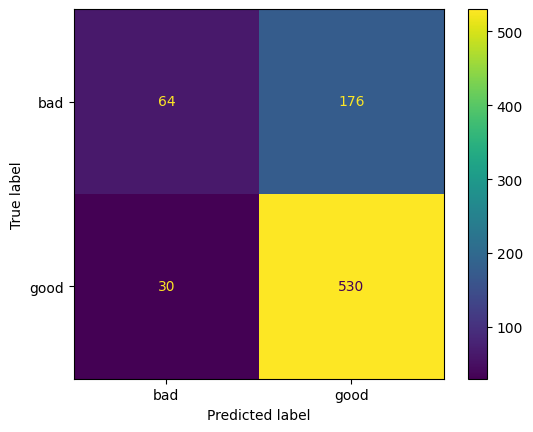

              precision    recall  f1-score   support

         bad       0.68      0.27      0.38       240
        good       0.75      0.95      0.84       560

    accuracy                           0.74       800
   macro avg       0.72      0.61      0.61       800
weighted avg       0.73      0.74      0.70       800


Test evaluation metrics:


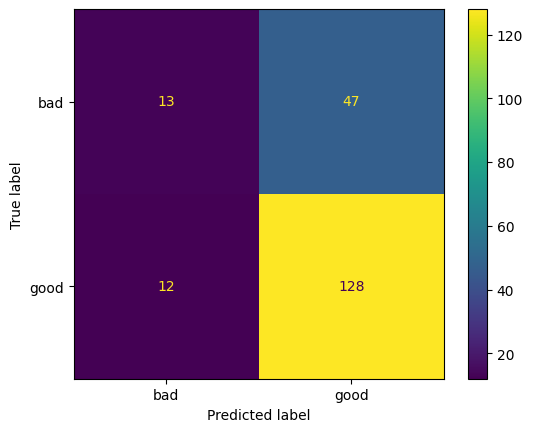

              precision    recall  f1-score   support

         bad       0.52      0.22      0.31        60
        good       0.73      0.91      0.81       140

    accuracy                           0.70       200
   macro avg       0.63      0.57      0.56       200
weighted avg       0.67      0.70      0.66       200



In [41]:
print("\nTrain evaluation metrics:")

y_pred_train = grid_dt_random.predict(X_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()
print(classification_report(y_train, y_pred_train))

# ============================================

print("\nTest evaluation metrics:")

y_pred_test = grid_dt_random.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()
print(classification_report(y_test, y_pred_test))

# Decision tree regression

Some classification algorithms, including decision trees, can be used as regression algorithms.

The **regression trees** consist of functions with discrete values, similar to a ladder, where each step is the value of a leaf. [Here](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html) there are details about the sklearn class.

Consider the following dataset:

<img src='https://s3-sa-east-1.amazonaws.com/lcpi/800a4332-e709-4ea3-8c24-959c05c8fd65.png' width=500>

The algorithm will obtain the target values as **the average of the values of each leaf of the final tree**.

Visually:

<img src='https://s3-sa-east-1.amazonaws.com/lcpi/64cb4edd-20e1-486a-8fc9-60e60e1485d5.png' width=500>

In order to choose the best breaks:

- the algorithm goes through the average between each pair of points of the features
- defines these values as divisions (sequentially)
- for each division tested, the algorithm calculates the MSE
- the best division is the one that presents the lowest error

Visually:

<img src='https://s3-sa-east-1.amazonaws.com/lcpi/be58ac8b-5c59-4b9f-be79-e000d060e9e3.png' width=500>

<img src='https://s3-sa-east-1.amazonaws.com/lcpi/1f317afd-6119-41a5-849d-cee038403cf2.png' width=500>

Another example of a trained regression tree (note the appearance of the hypothesis -- they are "sectors", which in a single dimension look like steps):

<img src="https://res.cloudinary.com/practicaldev/image/fetch/s--YryIJN_o--/c_imagga_scale,f_auto,fl_progressive,h_900,q_auto,w_1600/https://thepracticaldev.s3.amazonaws.com/i/7oxf0e3cggdj9jayxeig.png" width=600>

In [42]:
df = pd.read_csv("../data/house-prices.csv")

df = df.select_dtypes(include=[np.number])
df = df.dropna(axis="columns", how="any")

X = df.drop(columns=["Id","SalePrice"])
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold

# ============================================

pipe = Pipeline([("dt", DecisionTreeRegressor(random_state=42))])

# ============================================

param_grid_reg = {"dt__criterion" : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                   "dt__splitter" : ["best", "random"],
                   "dt__max_depth" : range(2, 11)} 

splitter = KFold(n_splits=10, shuffle=True, random_state=42)

grid_dt_reg = GridSearchCV(estimator=pipe,
                             param_grid=param_grid_reg,
                             scoring="neg_mean_absolute_error",
                             cv=splitter)

grid_dt_reg.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('dt',
                                        DecisionTreeRegressor(random_state=42))]),
             param_grid={'dt__criterion': ['squared_error', 'friedman_mse',
                                           'absolute_error', 'poisson'],
                         'dt__max_depth': range(2, 11),
                         'dt__splitter': ['best', 'random']},
             scoring='neg_mean_absolute_error')

In [44]:
grid_dt_reg.best_params_

{'dt__criterion': 'squared_error',
 'dt__max_depth': 8,
 'dt__splitter': 'random'}

In [45]:
grid_dt_reg.best_score_

-25020.561274119053

In [46]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred_train = grid_dt_reg.predict(X_train)

print("\nTrain evaluation metrics:")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

y_pred_test = grid_dt_reg.predict(X_test)

print("\nTest evaluation metrics:")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}") 


Train evaluation metrics:
R^2: 0.92
MAE: 15452.88
RMSE: 22477.22

Test evaluation metrics:
R^2: 0.79
MAE: 25781.67
RMSE: 40565.68


Let's consider the third best combination:

In [47]:
pipe = Pipeline([("dt", DecisionTreeRegressor(criterion="squared_error", 
                                              max_depth=6, 
                                              splitter="best",
                                              random_state=42))])

pipe.fit(X_train, y_train)

Pipeline(steps=[('dt', DecisionTreeRegressor(max_depth=6, random_state=42))])

In [48]:
y_pred_train = pipe.predict(X_train)

print("\nTrain evaluation metrics:")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

y_pred_test = pipe.predict(X_test)

print("\nTest evaluation metrics:")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}") 


Train evaluation metrics:
R^2: 0.91
MAE: 17666.57
RMSE: 23429.84

Test evaluation metrics:
R^2: 0.74
MAE: 26010.22
RMSE: 44656.43
